In [1]:
import optuna
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import mikeio

import contextily as ctx
import matplotlib.pyplot as plt


# Optimierung

**if two studies need to be loaded**

In [6]:
# Load both studies
optuna_db_old = "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/simulations/kali/optuna_journal_cali_old.log"
optuna_db_new = "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/simulations/kali/optuna_journal.log"
study_name = "hydronumeric_study"

# Create storage objects for both
storage_old = optuna.storages.JournalStorage(
    optuna.storages.JournalFileStorage(optuna_db_old),
)
storage_new = optuna.storages.JournalStorage(
    optuna.storages.JournalFileStorage(optuna_db_new),
)

# Load both studies
study_old = optuna.load_study(study_name=study_name, storage=storage_old)
study_new = optuna.load_study(study_name=study_name, storage=storage_new)

# Convert both to dataframes
df_old = study_old.trials_dataframe()
df_new = study_new.trials_dataframe()

# Get the last trial number from old study
last_number = df_old['number'].max()

# Update the numbering in the new dataframe
df_new['number'] = df_new['number'] + last_number + 1

# Concatenate the dataframes
study_df = pd.concat([df_old, df_new], ignore_index=False)

/tmp/ipykernel_1917/4040050566.py:8: FutureWarning: JournalFileStorage has been deprecated in v4.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v4.0.0. Use :class:`~optuna.storages.journal.JournalFileBackend` instead.
  optuna.storages.JournalFileStorage(optuna_db_old),
/tmp/ipykernel_1917/4040050566.py:11: FutureWarning: JournalFileStorage has been deprecated in v4.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v4.0.0. Use :class:`~optuna.storages.journal.JournalFileBackend` instead.
  optuna.storages.JournalFileStorage(optuna_db_new),


**loading single study**

In [2]:
optuna_db = "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/simulations/kali/optuna_journal.log"
study_name = "hydronumeric_study"

storage=optuna.storages.JournalStorage(
        optuna.storages.JournalFileStorage(optuna_db),
    )

study = optuna.load_study(study_name=study_name, storage=storage)
study_df = study.trials_dataframe()
study_df

/tmp/ipykernel_1917/2987412019.py:5: FutureWarning: JournalFileStorage has been deprecated in v4.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v4.0.0. Use :class:`~optuna.storages.journal.JournalFileBackend` instead.
  optuna.storages.JournalFileStorage(optuna_db),


number  values_0  values_1             datetime_start  \
0        0  0.404461  3.626226 2024-10-25 14:14:25.731397   
1        1  0.360054  3.892674 2024-10-25 15:50:17.715393   
2        2  0.263301  4.511189 2024-10-25 17:25:46.526467   
3        3  0.297724  4.336397 2024-10-25 19:01:22.612434   
4        4  0.288621  4.323612 2024-10-25 20:36:49.859516   
5        5  0.353121  3.910646 2024-10-25 22:12:09.072569   
6        6  0.317082  4.217488 2024-10-25 23:47:23.020943   
7        7  0.322820  4.166567 2024-10-26 01:22:31.585905   
8        8  0.380359  3.775142 2024-10-26 02:57:58.877944   
9        9  0.359110  3.959607 2024-10-26 04:33:24.508619   
10      10       NaN       NaN 2024-10-26 06:08:57.822827   
11      11       NaN       NaN 2024-10-26 06:16:08.675471   
12      12       NaN       NaN 2024-10-26 06:23:58.326220   
13      13  0.400763  3.727023 2024-10-26 06:31:44.871116   
14      14  0.297224  4.316862 2024-10-26 08:07:10.436027   
15      15  0.285301  4.417916 2024-10-26 09:42:39.811910   
16      16  0.357152  3.927838 2024-10-26 11:18:50.716354   
17      17  0.165383  5.378502 2024-10-26 12:56:56.336129   
18      18  0.338635  4.001344 2024-10-26 14:33:43.287371   
19      19  0.395940  3.674064 2024-10-26 16:10:42.224843   
20      20  0.395679  3.716980 2024-10-26 17:47:22.047437   
21      21  0.285682  4.461125 2024-10-26 19:23:46.781703   
22      22  0.407650  3.728867 2024-10-26 21:00:29.300512   
23      23  0.233601  4.717042 2024-10-26 22:36:55.565680   
24      24  0.372005  3.888207 2024-10-27 00:13:10.309184   
25      25  0.395840  3.723139 2024-10-27 01:49:52.775279   
26      26  0.312784  4.161131 2024-10-27 03:26:45.977896   
27      27  0.385701  3.716558 2024-10-27 05:03:44.996769   
28      28  0.335528  4.058123 2024-10-27 06:40:53.074121   
29      29  0.328814  4.142167 2024-10-27 08:18:54.619435   
30      30  0.362524  3.859981 2024-10-27 09:57:25.121074   
31      31       NaN       NaN 2024-10-27 11:35:33.052346   
32      32  0.345789  3.918033 2024-10-27 11:44:40.308490   
33      33  0.360028  3.904849 2024-10-27 13:22:37.086019   
34      34  0.398851  3.667824 2024-10-27 14:59:15.270503   
35      35       NaN       NaN 2024-10-27 16:36:19.235313   
36      36  0.369225  3.852667 2024-10-27 16:46:57.545699   
37      37  0.316556  4.220494 2024-10-27 18:25:17.601524   
38      38  0.367159  3.915374 2024-10-27 20:03:02.680246   
39      39  0.241506  4.739851 2024-10-27 21:39:49.937060   
40      40  0.293760  4.425339 2024-10-27 23:16:32.288184   
41      41  0.386585  3.807927 2024-10-28 00:53:24.068042   
42      42  0.334696  3.961164 2024-10-28 02:30:33.785176   
43      43  0.371647  3.894244 2024-10-28 04:07:20.257773   
44      44       NaN       NaN 2024-10-28 05:44:47.020006   

            datetime_complete               duration  params_roughness_cell_0  \
0  2024-10-25 15:50:17.712960 0 days 01:35:51.981563                   75.251   
1  2024-10-25 17:25:46.524892 0 days 01:35:28.809499                   65.011   
2  2024-10-25 19:01:22.610550 0 days 01:35:36.084083                   10.951   
3  2024-10-25 20:36:49.857714 0 days 01:35:27.245280                   23.941   
4  2024-10-25 22:12:09.070554 0 days 01:35:19.211038                   72.791   
5  2024-10-25 23:47:23.018576 0 days 01:35:13.946007                   65.111   
6  2024-10-26 01:22:31.570394 0 days 01:35:08.549451                   28.521   
7  2024-10-26 02:57:58.875908 0 days 01:35:27.290003                   23.381   
8  2024-10-26 04:33:24.506775 0 days 01:35:25.628831                   54.001   
9  2024-10-26 06:08:57.820769 0 days 01:35:33.312150                   63.271   
10 2024-10-26 06:16:08.673987 0 days 00:07:10.851160                   44.641   
11 2024-10-26 06:23:58.324865 0 days 00:07:49.649394                   40.781   
12 2024-10-26 06:31:44.869735 0 days 00:07:46.543515                   17.011   
13 2024-10-26 08:07:10.434186 0 days 01:35:25.563070           

In [10]:
study_df.describe()

number    values_0    values_1                 datetime_start  \
count  153.000000  128.000000  128.000000                            153   
mean    76.000000    0.250974    4.688781  2024-10-22 13:24:22.983248896   
min      0.000000    0.085846    3.626226     2024-10-17 08:35:58.613896   
25%     38.000000    0.187094    4.290671     2024-10-19 07:18:50.712384   
50%     76.000000    0.248213    4.621403  2024-10-22 11:57:40.871759872   
75%    114.000000    0.295205    5.184566  2024-10-25 23:47:23.020943104   
max    152.000000    0.407650    6.776835     2024-10-28 05:44:47.020006   
std     44.311398    0.077498    0.618218                            NaN   

                   datetime_complete                   duration  \
count                            152                        152   
mean   2024-10-22 13:53:48.104109312  0 days 01:23:14.226365453   
min       2024-10-17 08:47:22.795602     0 days 00:07:10.851160   
25%    2024-10-19 08:30:43.205710848     0 days 01:35:58.131539   
50%    2024-10-22 12:46:03.143021312  0 days 01:36:18.564029500   
75%    2024-10-26 00:11:10.156530432     0 days 01:37:00.252450   
max       2024-10-28 05:44:47.016258     0 days 01:42:03.862653   
std                              NaN  0 days 00:31:28.651122720   

       params_roughness_cell_0  params_roughness_cell_1  \
count               153.000000               153.000000   
mean                 24.797288                23.404020   
min                   0.100000                 1.100000   
25%                  12.100000                 6.100000   
50%                  21.100000                19.100000   
75%                  29.100000                29.100000   
max                  80.021000                80.131000   
std                  20.072721                21.123155   

       params_roughness_cell_2  params_roughness_cell_3  ...  \
count               153.000000               153.000000  ...   
mean                 22.739706                20.509118  ...   
min                   0.100000                 0.100000  ...   
25%                  10.100000                 4.100000  ...   
50%                  19.100000                18.100000  ...   
75%                  29.100000                25.100000  ...   
max                  80.611000                80.831000  ...   
std                  17.744796                19.660284  ...   

       params_smagorinsky_cell_1  params_smagorinsky_cell_2  \
count                 153.000000                 153.000000   
mean                    0.216471                   0.226928   
min                     0.020000                   0.060000   
25%                     0.140000                   0.160000   
50%                     0.200000                   0.220000   
75%                     0.280000                   0.280000   
max                     0.500000                   0.480000   
std                     0.109355                   0.092944   

       params_smagorinsky_cell_3  params_smagorinsky_cell_4  \
count                 153.000000                 153.000000   
mean                    0.215948                   0.214248   
min                     0.020000                   0.020000   
25%                     0.160000                   0.140000   
50%                     0.200000                   0.200000   
75%                     0.280000                   0.280000   
max                     0.500000                   0.480000   
std                     0.095404                   0.104546   

       params_smagorinsky_cell_5  params_smagorinsky_cell_6  \
count                 153.000000                 153.000000   
mean                    0.225229                   0.226667   
min                     0.020000                   0.060000   
25%                     0.160000                   0.160000   
50%                     0.220000                   0.220000   
75%                     0.280000                   0.280000   
max                     0.480000    

In [15]:
# find best trials
pareto_front_trials = study.best_trials
pareto_front_trials

[FrozenTrial(number=60, state=TrialState.COMPLETE, values=[0.08584629762643962, 6.776835404487746], datetime_start=datetime.datetime(2024, 10, 21, 13, 1, 45, 34350), datetime_complete=datetime.datetime(2024, 10, 21, 14, 38, 16, 732290), params={'roughness_cell_0': 29.1, 'roughness_cell_1': 23.1, 'roughness_cell_2': 0.1, 'roughness_cell_3': 24.1, 'roughness_cell_4': 14.1, 'roughness_cell_5': 1.1, 'roughness_cell_6': 20.1, 'roughness_cell_7': 23.1, 'roughness_cell_8': 0.1, 'roughness_cell_9': 28.1, 'smagorinsky_cell_0': 0.28, 'smagorinsky_cell_1': 0.2, 'smagorinsky_cell_2': 0.22, 'smagorinsky_cell_3': 0.3, 'smagorinsky_cell_4': 0.22, 'smagorinsky_cell_5': 0.26, 'smagorinsky_cell_6': 0.3, 'smagorinsky_cell_7': 0.14, 'smagorinsky_cell_8': 0.14, 'smagorinsky_cell_9': 0.22}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'roughness_cell_0': FloatDistribution(high=31.1, log=False, low=0.1, step=1.0), 'roughness_cell_1': FloatDistribution(high=31.1,

In [19]:
# compute cc from best log-transformed cc
transformed_cc = 6.776835404487746
cc = 1 - np.exp(-transformed_cc)
print(cc)

0.9988601235555236


## Übersicht Pareto Front und Zeitreihen

### Pareto

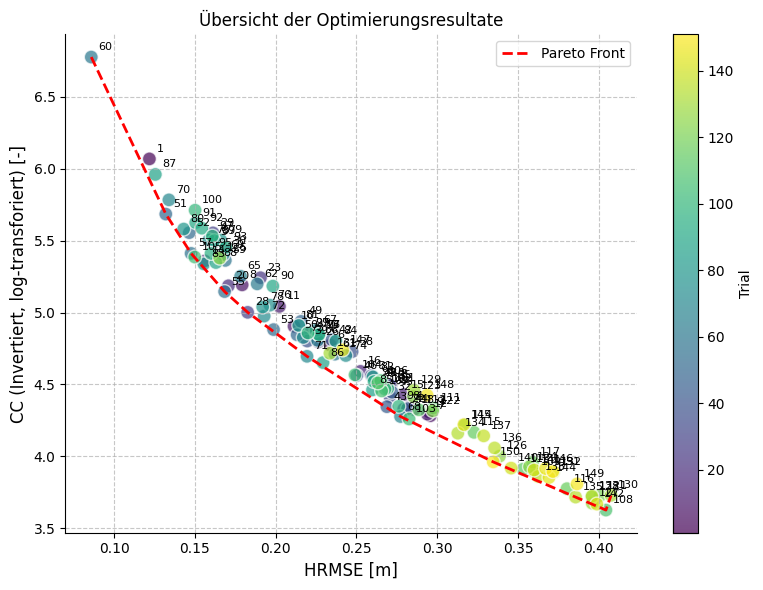

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
import seaborn as sns

def plot_pareto_front(df, obj1_label='Objective 1', obj2_label='Objective 2', title='Pareto Front of Optimization Results'):
    # Remove NaN values
    df_clean = df.dropna(subset=['values_0', 'values_1'])

    # Extract values
    values_0 = df_clean['values_0'].values
    values_1 = df_clean['values_1'].values
    numbers = df_clean['number'].values

    # Identify Pareto front
    points = np.column_stack((values_0, values_1))
    hull = ConvexHull(points)
    pareto_front = points[hull.vertices]

    # Set up the plot
    plt.figure(figsize=(8, 6))

    # Plot all points
    scatter = plt.scatter(values_0, values_1, c=numbers, cmap='viridis', 
                          s=100, alpha=0.7, edgecolors='w')

    # Add trial numbers next to points
    for i, txt in enumerate(numbers):
        plt.annotate(txt, (values_0[i], values_1[i]), xytext=(5, 5), 
                     textcoords='offset points', fontsize=8)

    # Plot Pareto front
    pareto_front = pareto_front[pareto_front[:, 0].argsort()]
    plt.plot(pareto_front[:, 0], pareto_front[:, 1], 'r--', linewidth=2, label='Pareto Front')

    # Customize the plot
    plt.title(title, fontsize=12)
    plt.xlabel(obj1_label, fontsize=12)
    plt.ylabel(obj2_label, fontsize=12)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Trial', fontsize=10)
    plt.legend(fontsize=10)

    # Improve aesthetics
    plt.grid(True, linestyle='--', alpha=0.7)
    sns.despine()

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming study_df is already defined
df = study_df.copy()

# Call the function with custom labels
plot_pareto_front(df, 
                  obj1_label='HRMSE [m]', 
                  obj2_label='CC (Invertiert, log-transforiert) [-]', 
                  title='Übersicht der Optimierungsresultate')

### Gantt

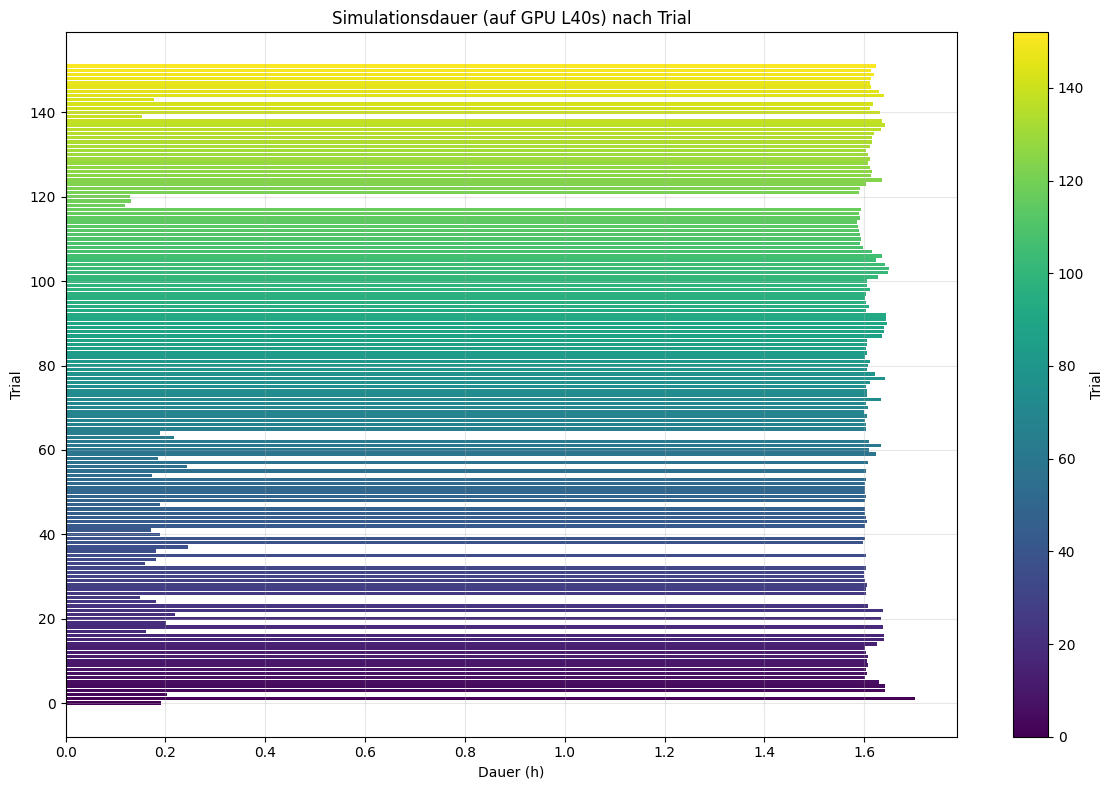

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, viridis

# Convert datetime columns to datetime if they aren't already
study_df['datetime_start'] = pd.to_datetime(study_df['datetime_start'])
study_df['datetime_complete'] = pd.to_datetime(study_df['datetime_complete'])

# Calculate duration for each trial
durations = (study_df['datetime_complete'] - study_df['datetime_start'])

# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Create color mapping based on trial numbers
norm = Normalize(vmin=study_df['number'].min(), vmax=study_df['number'].max())
colors = [viridis(norm(x)) for x in study_df['number']]

# Calculate start times relative to first simulation
first_start = study_df['datetime_start'].min()
relative_starts = [(start - first_start).total_seconds()/3600 for start in study_df['datetime_start']]

# Plot horizontal bars
bars = []
for idx, (start, duration, color) in enumerate(zip(relative_starts, durations, colors)):
    bar = ax.barh(y=study_df['number'].iloc[idx], 
                 width=duration.total_seconds()/3600,  # Convert to hours
                 left=0,  # Start all bars at 0
                 color=color,
                 height=0.8)
    bars.append(bar)

# Customize the plot
ax.set_title('Simulationsdauer (auf GPU L40s) nach Trial', fontsize=12)
ax.set_xlabel('Dauer (h)', fontsize=10)
ax.set_ylabel('Trial', fontsize=10)

# Add colorbar with explicit axes reference
sm = ScalarMappable(norm=norm, cmap=viridis)
sm.set_array([])  # Required for matplotlib < 3.3
plt.colorbar(sm, ax=ax, label='Trial')

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Parameter importance

In [28]:
# For each objective
optuna.visualization.plot_param_importances(study_old, target=lambda t: t.values[0])  # for RMSE
# Create the importance plot
fig = optuna.visualization.plot_param_importances(study, target=lambda t: t.values[0])  # for RMSE

# Customize the layout
fig.update_layout(
    # Increase figure size
    width=1000,
    height=600,
    
    # Customize x-axis
    xaxis=dict(
        tickangle=45,  # Rotate labels
        tickfont=dict(size=12),  # Adjust font size
    ),
    
    # Customize y-axis
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
    ),
    
    # Adjust margins to ensure labels are visible
    margin=dict(
        b=150,  # bottom margin
        l=100,  # left margin
        r=50,   # right margin
        t=50    # top margin
    ),
    
    # Customize title
    title=dict(
        text="Parameter Sensitivität für RMSE",
        font=dict(size=16),
        y=0.95
    )
)

# Show the plot
fig.show()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/optuna/visualization/_utils.py:67: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/optuna/visualization/_utils.py:67: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.



In [29]:
# For each objective
optuna.visualization.plot_param_importances(study_old, target=lambda t: t.values[1])  # for CC
# Create the importance plot
fig = optuna.visualization.plot_param_importances(study, target=lambda t: t.values[1])  # for CC

# Customize the layout
fig.update_layout(
    # Increase figure size
    width=1000,
    height=600,
    
    # Customize x-axis
    xaxis=dict(
        tickangle=45,  # Rotate labels
        tickfont=dict(size=12),  # Adjust font size
    ),
    
    # Customize y-axis
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
    ),
    
    # Adjust margins to ensure labels are visible
    margin=dict(
        b=150,  # bottom margin
        l=100,  # left margin
        r=50,   # right margin
        t=50    # top margin
    ),
    
    # Customize title
    title=dict(
        text="Parameter Sensitivität für CC",
        font=dict(size=16),
        y=0.95
    )
)

# Show the plot
fig.show()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/optuna/visualization/_utils.py:67: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/optuna/visualization/_utils.py:67: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.



### Zeitreihen

beste gehighlighted

Plotting for station: Blankenese


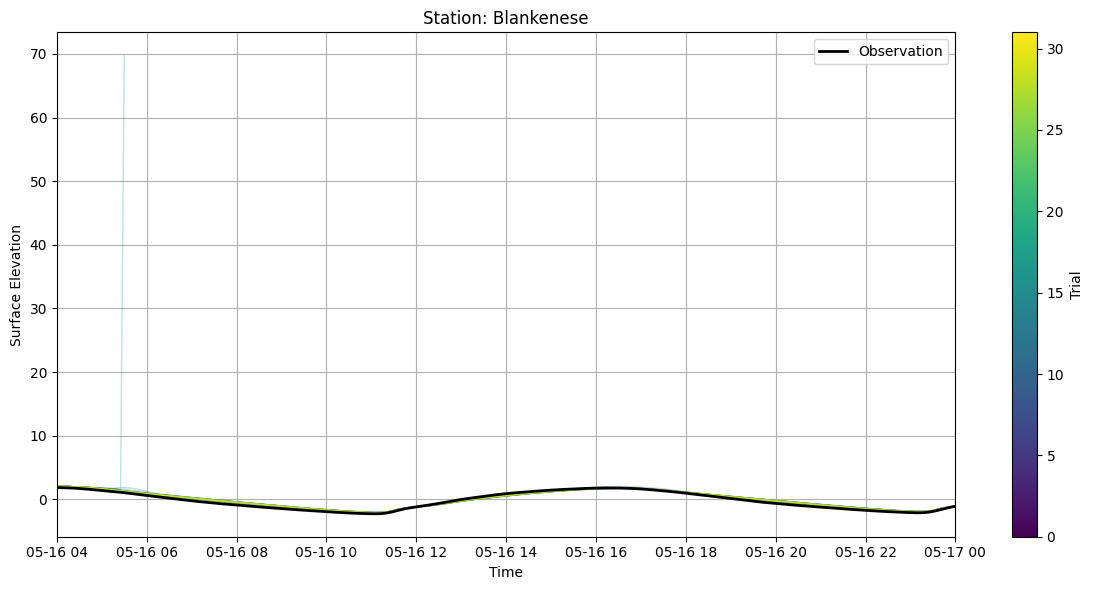

Plotting for station: Bunthaus


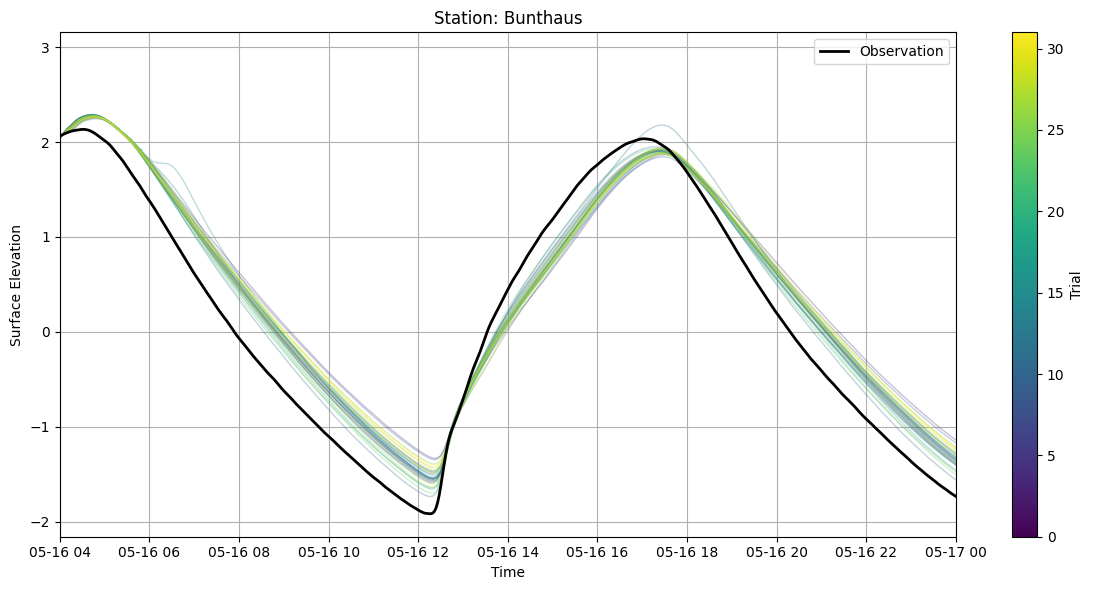

Plotting for station: Harburg


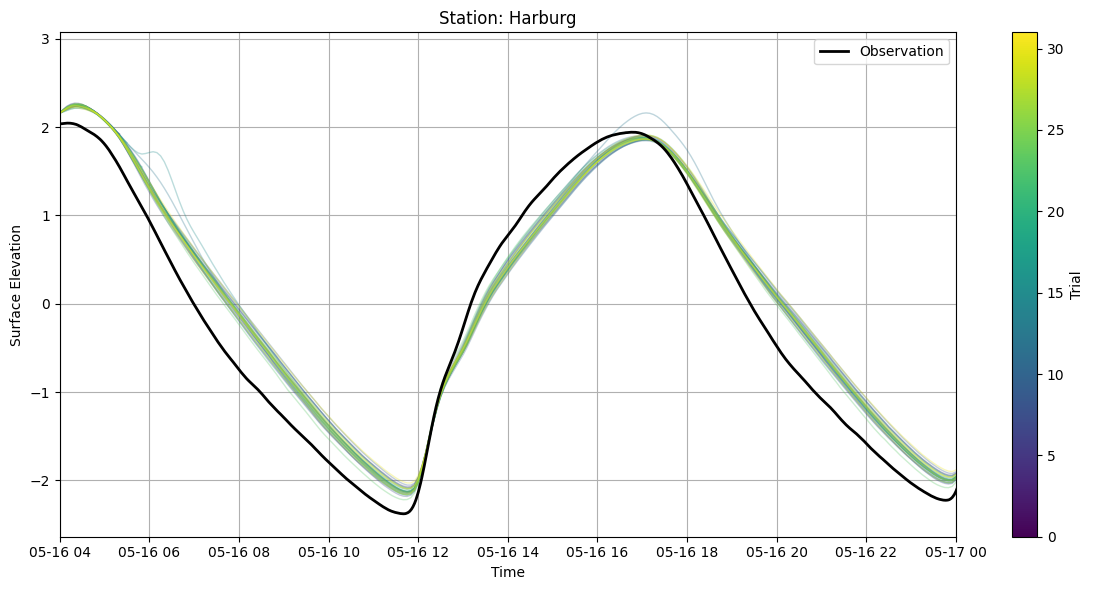

Plotting for station: Schoepfstelle


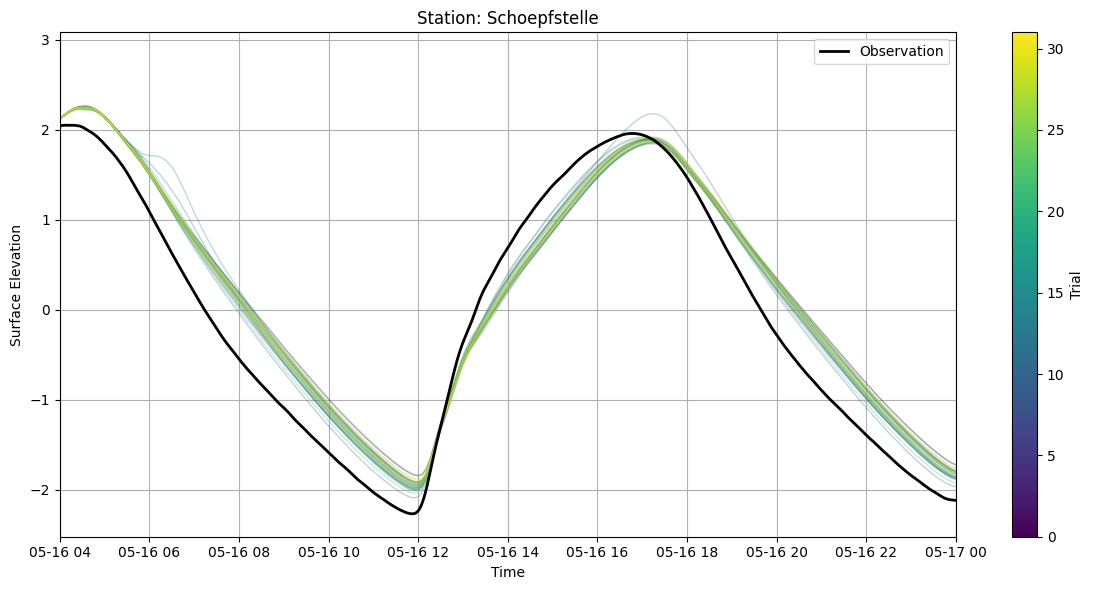

Plotting for station: Seemannshoeft


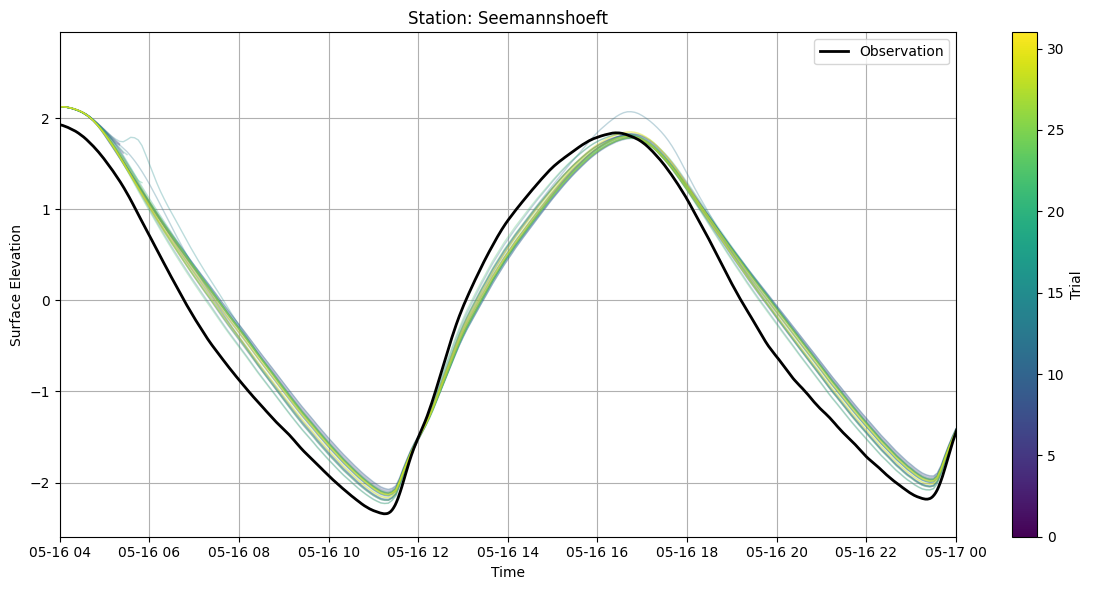

Plotting for station: StPauli


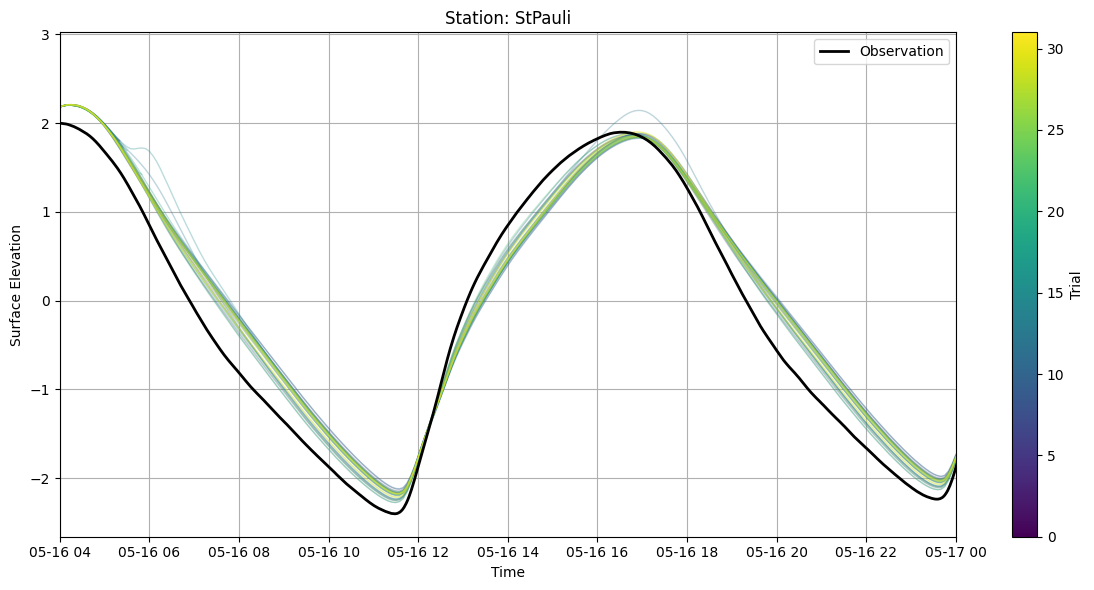

In [9]:
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import numpy as np
import pandas as pd

def plot_station(station_name, sim_data, obs_data, best_trial):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Adjust station name for Sankt Pauli
    sim_station_name = "Sankt Pauli" if station_name == "StPauli" else station_name
    full_station_name = f"{sim_station_name}: Surface elevation"

    # Create a color map
    cmap = plt.get_cmap('viridis')
    norm = mcolors.Normalize(vmin=0, vmax=len(sim_data)-1)

    # Plot all simulations with viridis colormap
    for i, (sim_name, df) in enumerate(sim_data.items()):
        if full_station_name not in df.columns:
            print(f"Station '{sim_station_name}' not found in simulation '{sim_name}'. Available stations: {df.columns}")
            continue

        color = cmap(norm(i))
        ax.plot(df.index, df[full_station_name], color=color, alpha=0.3, linewidth=1)

    # Plot the best trial last and with a distinct style
    if best_trial in sim_data:
        best_df = sim_data[best_trial]
        ax.plot(best_df.index, best_df[full_station_name], color='red', linewidth=2, label=f'{best_trial} (Best Trial)')

    # Plot observation in black
    ax.plot(obs_data.index, obs_data['surface elevation'], color='black', linewidth=2, label='Observation')

    # Set x-axis limits to match the simulation data's time range
    sim_time_range = pd.concat([pd.Series(df.index) for df in sim_data.values()]).min(), pd.concat([pd.Series(df.index) for df in sim_data.values()]).max()
    ax.set_xlim(sim_time_range)

    # Add labels and legend
    ax.set_title(f"Station: {station_name}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Surface Elevation")
    ax.legend()
    ax.grid(True)

    # Add colorbar
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Trial')

    plt.tight_layout()
    plt.show()

# Paths to simulation and observation folders
main_model_fold = "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/simulations/kali/"
obs_fold = "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/misc_data/observations"


# Filter result folders to only include those containing '_trial_'
result_folds = [f for f in glob.glob(main_model_fold + "/* - Result Files") if '_trial_' in f]
obs_files = [f for f in glob.glob(obs_fold + "/*.dfs0") if 'HADCP' not in f and 'Koehlbrandhoeft' not in f]
 

# Filter study_df to exclude pruned and failed trials
valid_trials = study_df[(study_df['state'] == 'COMPLETE') & 
                        (~study_df['values_0'].isna()) & 
                        (~study_df['values_1'].isna())]

# Find the best trial (assuming lower values are better)
best_trial_index = valid_trials['values_0'].idxmin()
best_trial_number = valid_trials.loc[best_trial_index, 'number']
best_trial_name = f"simulation_trial_{best_trial_number}.m3fm - Result Files"

# Read all simulation results into a dictionary
sim_data = {}
for result_fold in result_folds:
    trial_number = int(result_fold.split('_trial_')[1].split('.')[0])
    if trial_number in valid_trials['number'].values:
        sim_files = glob.glob(result_fold + "/*.dfs0")
        for sim_file in sim_files:
            sim_name = result_fold.split('/')[-1]
            sim_data[sim_name] = mikeio.read(sim_file).to_dataframe()

# Read all observation data into a dictionary
obs_data = {}
for obs_file in obs_files:
    station_name = obs_file.split('/')[-1].split('_')[1]
    obs_data[station_name] = mikeio.read(obs_file).to_dataframe()

# Plot each station
for station_name, obs_df in obs_data.items():
    print(f"Plotting for station: {station_name}")
    plot_station(station_name, sim_data, obs_df, best_trial_name)

# Anfangs- und Beste Parameter

als Startpunkt ist lediglich die Zonierung wichtig. Diese ist für Rauheit und Smagorinsky identisch gewählt.


aus best_trial_number etc. Hier "bester" in erster Dimension (HRMSE) gewählt. 

zones: 10
values: [ 4.1  9.1 10.1 11.1 12.1 20.1 21.1 22.1 23.1 24.1]


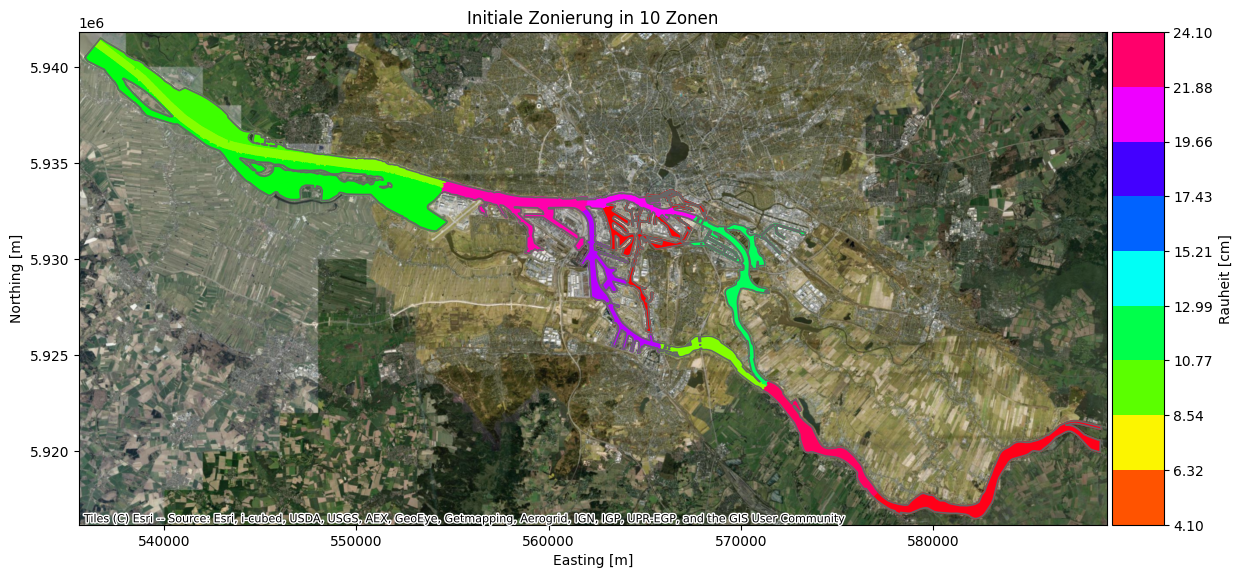

zones: 6
values: [ 0.1  1.1 14.1 20.1 28.1 29.1]


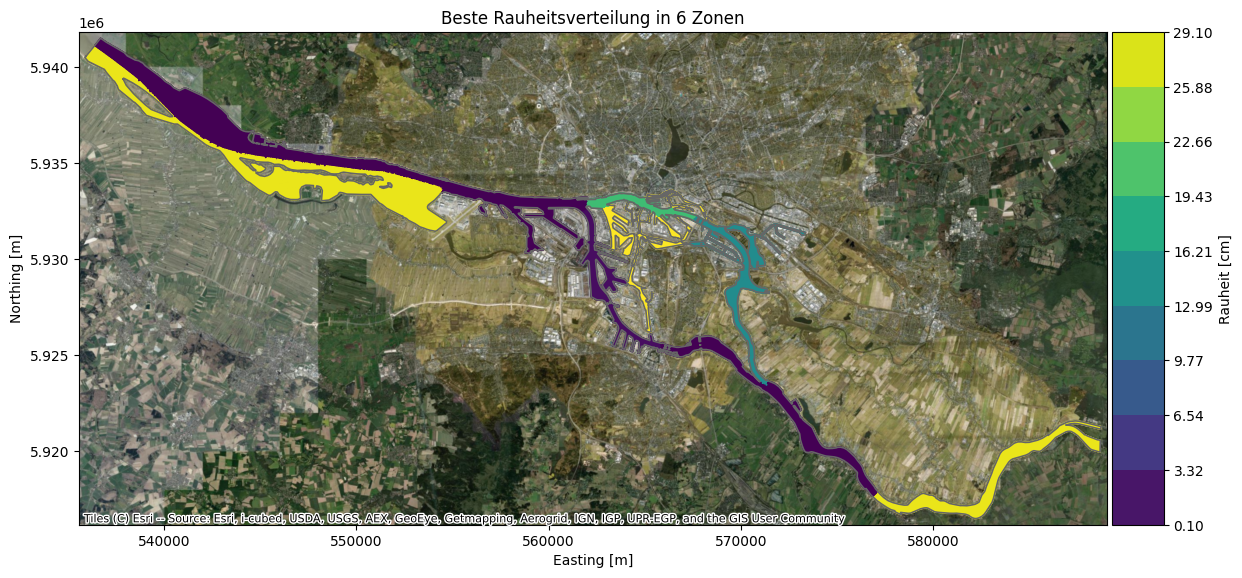

zones: 6
values: [0.14 0.2  0.22 0.26 0.28 0.3 ]


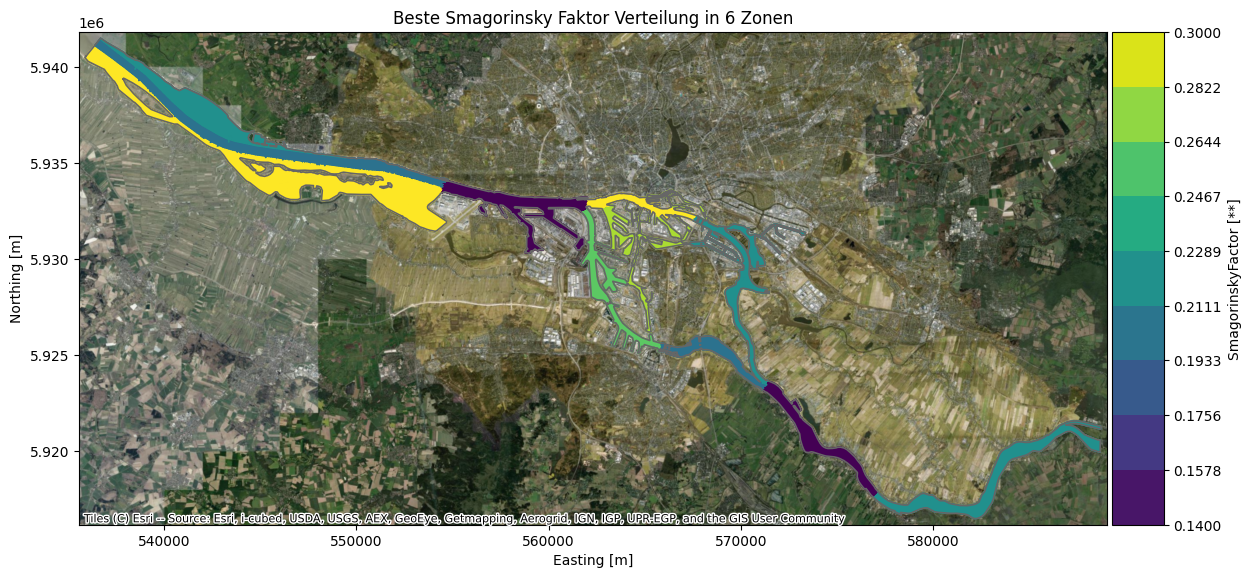

In [8]:

def plot_dfsu_zones(file_path, title_prefix, cmap="hsv", figsize=(14, 8)):
    dfs = mikeio.read(file_path)
    ori_values = np.unique(dfs[0].values)
    
    print(f"zones: {len(ori_values)}\nvalues: {ori_values}")
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    dfs[0].plot(cmap=cmap, ax=ax, title=f"{title_prefix} in {len(ori_values)} Zonen")
    
    source = ctx.providers.Esri.WorldImagery
    ctx.add_basemap(ax, crs="epsg:25832", source=source, zoom=12)
    
    plt.show()

# Base path
base_path = "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/simulations/kali/"

# Plot zones
zone_file = f"{base_path}roughness_initial/roughness_initial_10zones.dfsu"
plot_dfsu_zones(zone_file, "Initiale Zonierung")

# Plot roughness
roughness_file = f"{base_path}roughness_trial_{best_trial_index}.dfsu"
plot_dfsu_zones(roughness_file, "Beste Rauheitsverteilung", cmap="viridis")

# Plot Smagorinsky
smag_file = f"{base_path}smagorinsky_trial_{best_trial_index}.dfsu"
plot_dfsu_zones(smag_file, "Beste Smagorinsky Faktor Verteilung", cmap="viridis")